#**Mini-Project 1: Modern Low Footprint Cyber Attack Detection** 


#**Supervised Learning Models for Binary Classification- Logistic Regression,Nearest Neighbor (NN), Support Vector Machine(SVM)**

##**Import helper functions**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/My Drive/P1_Final/"
!pip install import-ipynb
import import_ipynb

# importing helper functions for data preprocessing and model visualization
import plotlib_helper as graphplot
import datapreprocess_helper as dataprep

/content/drive/My Drive/P1_Final
  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=a952c025267919f55699ee4b895f71e430dbcd5571b313a054667789904afe08
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb
importing Jupyter notebook from plotlib_helper.ipynb
importing Jupyter notebook from datapreprocess_helper.ipynb


##**Load preprocessed data**

In [3]:
import pandas as pd
import io
import requests
import os
import numpy as np
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
path = "/content/drive/My Drive/P1_Final/"

train_read = os.path.join(path,"data/P1_Supervised_preprocess_TRAINSET.csv")
test_read = os.path.join(path,"data/P1_Supervised_preprocess_TESTSET.csv")
df_train = pd.read_csv(train_read)
df_test= pd.read_csv(test_read)

##**Prepare data for Supervised Learning Models**


In [4]:
# Train data
y_train=df_train.label
y_train=y_train.to_numpy()
x_train=df_train.drop('label', axis=1)
x_train=x_train.to_numpy()

# Encode output
attack = dataprep.encode_text_index(df_train,'label')
print(attack)

# Test data
y_test=df_test.label
y_test=y_test.to_numpy()
x_test=df_test.drop('label', axis=1)
x_test=x_test.to_numpy()


[0 1]


In [5]:
print("X train shape:", x_train.shape)
print("X test shape:", x_test.shape)
print("Y train shape:", y_train.shape)
print("Y test shape:", y_test.shape)

X train shape: (81173, 65)
X test shape: (35179, 65)
Y train shape: (81173,)
Y test shape: (35179,)


##**MODEL : LOGISTIC REGRESSION**

In [6]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model 
logreg = LogisticRegression(solver='sag',multi_class="ovr", class_weight='balanced',max_iter=100000) # solver changed to sag since large dataset is being used
# fit the model with data
logreg.fit(x_train, y_train)

# predict the response for new observations
pred = logreg.predict(x_test)
print(pred)

[0 0 0 ... 0 0 0]


###**Model Performance Evaluation: Logistic Regression**

Performance Metrics - Logistic Regression
---------------------------------------
Accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0
F1 score: 1.0


[[ 9625     0]
 [    0 25554]]


Plotting confusion matrix


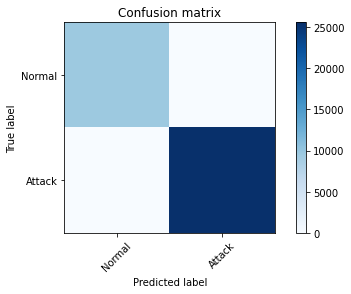



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9625
           1       1.00      1.00      1.00     25554

    accuracy                           1.00     35179
   macro avg       1.00      1.00      1.00     35179
weighted avg       1.00      1.00      1.00     35179




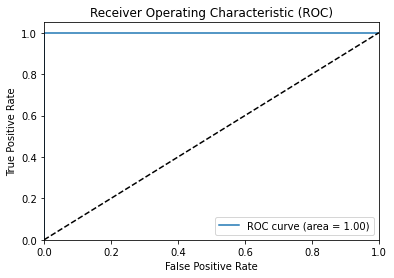

In [7]:
plotROC = True
isNeuralNet = False
graphplot.performance_metrics(pred, y_test, ["Normal", "Attack"], "Performance Metrics - Logistic Regression", plotROC, isNeuralNet)


##**MODEL : NEAREST NEIGHBOR**

In [8]:
# Train data
y_train=df_train.label
y_train=y_train.to_numpy()
x_train=df_train.drop('label', axis=1)
x_train=x_train.to_numpy()

# Encode output
attack = dataprep.encode_text_index(df_train,'label')
print(attack)

# Test data
y_test=df_test.label
y_test=y_test.to_numpy()
x_test=df_test.drop('label', axis=1)
x_test=x_test.to_numpy()


[0 1]


In [9]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics 


# instantiate the model 
model_nn = KNeighborsClassifier(n_neighbors=3)

# fit the model with data
model_nn.fit(x_train, y_train)
# predict the response for new observations
pred=model_nn.predict(x_test)

###**Model Performance Evaluation: Nearest Neighbor**

Performance Metrics - Nearest Neighbor
---------------------------------------
Accuracy score: 0.9930071917905569
Precision score: 0.9930511467500288
Recall score: 0.9930071917905569
F1 score: 0.9929824648509145


[[ 9395   230]
 [   16 25538]]


Plotting confusion matrix


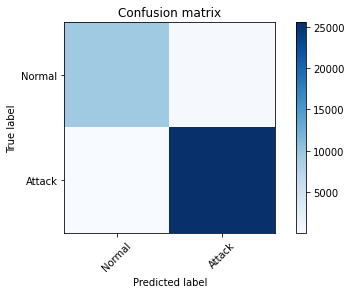



              precision    recall  f1-score   support

           0       1.00      0.98      0.99      9625
           1       0.99      1.00      1.00     25554

    accuracy                           0.99     35179
   macro avg       0.99      0.99      0.99     35179
weighted avg       0.99      0.99      0.99     35179




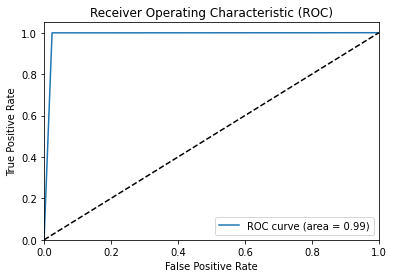

In [10]:
plotROC = True
isNeuralNet = False
graphplot.performance_metrics(pred, y_test, ["Normal", "Attack"], "Performance Metrics - Nearest Neighbor", plotROC, isNeuralNet)

##**MODEL : SUPPORT VECTOR MACHINE**

In [11]:
# Train data
y_train=df_train.label
y_train=y_train.to_numpy()
x_train=df_train.drop('label', axis=1)
x_train=x_train.to_numpy()

# Encode output
attack = dataprep.encode_text_index(df_train,'label')
print(attack)

# Test data
y_test=df_test.label
y_test=y_test.to_numpy()
x_test=df_test.drop('label', axis=1)
x_test=x_test.to_numpy()


[0 1]


In [12]:
from sklearn.svm import SVC
from sklearn import metrics 

# instantiate the model 
model_svm = SVC(C=9402.684872249694, gamma=0.0001)
#model_svm = SVC()
# fit the model with data
model_svm.fit(x_train, y_train) 
# predict the response for new observations
pred=model_svm.predict(x_test)


###**Model Performance Evaluation: Support Vector Machine**

Performance Metrics - Support Vector Machine
---------------------------------------
Accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0
F1 score: 1.0


[[ 9625     0]
 [    0 25554]]


Plotting confusion matrix


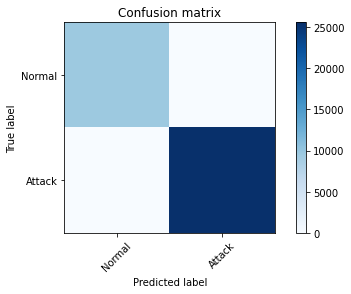



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9625
           1       1.00      1.00      1.00     25554

    accuracy                           1.00     35179
   macro avg       1.00      1.00      1.00     35179
weighted avg       1.00      1.00      1.00     35179




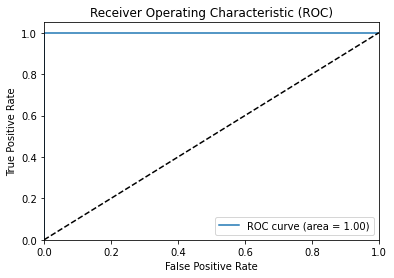

In [13]:
plotROC = True
isNeuralNet = False
graphplot.performance_metrics(pred, y_test, ["Normal", "Attack"], "Performance Metrics - Support Vector Machine", plotROC, isNeuralNet)